In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image1 = cv2.imread("secondPic1.jpg")
image2 = cv2.imread("secondPic2.jpg")
images = [image1,image2]
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
kpList = []
featuresList = []

In [3]:
def detectAndDescribe(image):
    descriptor = cv2.xfeatures2d.SIFT_create()
    (keypoints, features) = descriptor.detectAndCompute(image, None)
    return (keypoints,features)

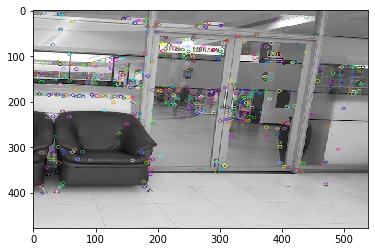

In [4]:
for i in range(len(images)) :
    (kp,features) = detectAndDescribe(images[i])
    kpList.append(kp)
    featuresList.append(features)
    key_points_image = cv2.drawKeypoints(images[i],kpList[i],outImage=None)
    plt.imshow(key_points_image, aspect='auto')

In [5]:
# bf = cv2.BFMatcher()
# matches = bf.knnMatch(featuresList[0],featuresList[1], k=2)

In [6]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(featuresList[0],featuresList[1],k=2)

In [7]:
good = []
list_kp1 = []
list_kp2 = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        img1_idx = m.queryIdx
        img2_idx = m.trainIdx
        (x1, y1) = kpList[0][img1_idx].pt
        (x2, y2) = kpList[1][img2_idx].pt
        list_kp1.append([x1, y1])
        list_kp2.append([x2, y2])

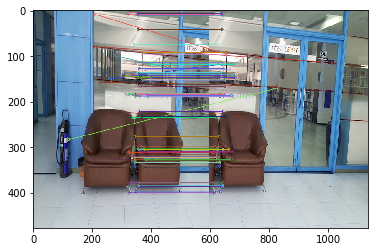

In [8]:
list_kp1 = np.array(list_kp1)
list_kp2 = np.array(list_kp2)
img3 = cv2.drawMatchesKnn(image1,kpList[0],image2,kpList[1],good[:100],flags=2,outImg=None)
plt.imshow(img3,aspect='auto')

In [9]:
h, status = cv2.findHomography(list_kp2, list_kp1, cv2.RANSAC)

In [10]:
print(image1.shape, image2.shape)
(height1,width1,channels) = image1.shape
(height2,width2,channels) = image2.shape
panorama = cv2.warpPerspective(image2, h, (width2+width1,height1))
print(panorama.shape)

(478, 597, 3) (478, 539, 3)
(478, 1136, 3)


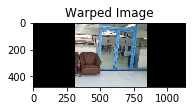

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
plt.subplot(122),plt.imshow(panorama),plt.title('Warped Image')
plt.show()
plt.figure()

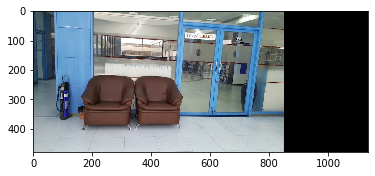

In [12]:
panorama[0:image1.shape[0], 0:image1.shape[1]] = image1
# cv2.imwrite(‘output.jpg’,dst)
plt.imshow(panorama)
plt.show()

In [13]:
cv2.imwrite('panorama_output.jpg',panorama)

True